# Ensemble Methods

Random Forest is an ensemble learning method that operates by creating multiple decision trees during training and aggregating  predictions. 
It is used for both classification and regression tasks. 
The main idea behind Random Forests is to introduce randomness in the tree building process, which leads to a diverse set of trees. 

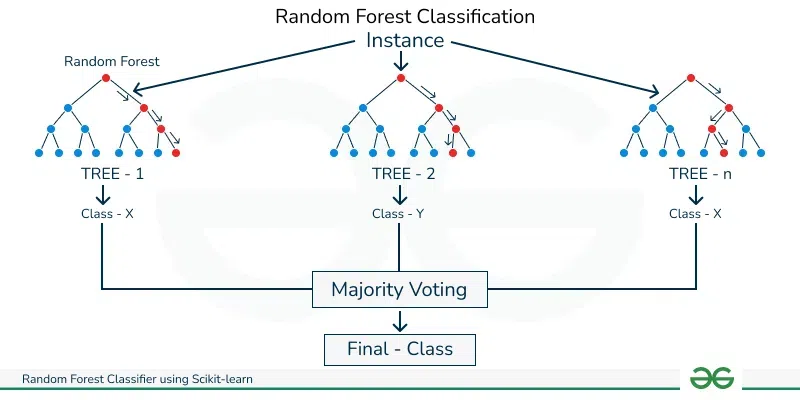


We will apply the ensemble learning methods on the heart dicease dataset. We will select the two features: `age` and `thalach` to do this.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions



# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Datasets/heart.csv")
X = df[['age', 'thalach']].values
y = df['target'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

# Scale features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)



In [5]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       203
           1       0.64      0.82      0.72       207

    accuracy                           0.68       410
   macro avg       0.69      0.67      0.67       410
weighted avg       0.69      0.68      0.67       410
 



With 500 trees of max depth of 1, the Random Forest achieved ~0.69 accuracy, and its recall for class 0 was low (0.53), suggesting difficulty identifying the negative class.

Let's compare the performance of the Forest Classifier with DecisionTreeClassifier and BaggingClassifier

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



Tree Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       203
           1       0.89      0.93      0.91       207

    accuracy                           0.90       410
   macro avg       0.91      0.90      0.90       410
weighted avg       0.91      0.90      0.90       410
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       203
           1       0.69      0.78      0.73       207

    accuracy                           0.71       410
   macro avg       0.71      0.71      0.71       410
weighted avg       0.71      0.71      0.71       410
 



So Random Forest had the lowest accuracy of the three (~0.69).

/Users/aigerimzhadikbay/inde577/Aigerim-CMOR-438-Spring-2025/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


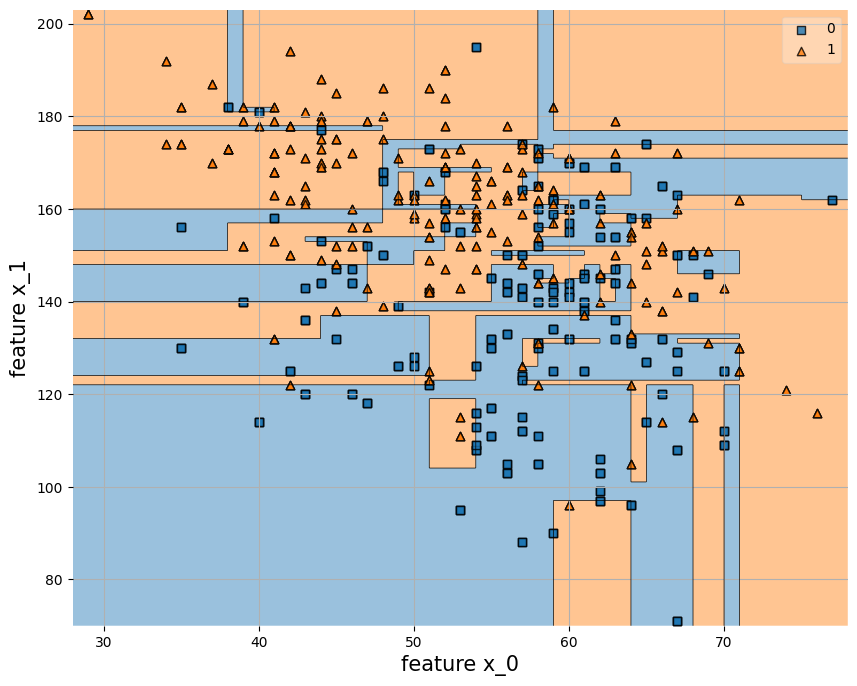

In [14]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

/Users/aigerimzhadikbay/inde577/Aigerim-CMOR-438-Spring-2025/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


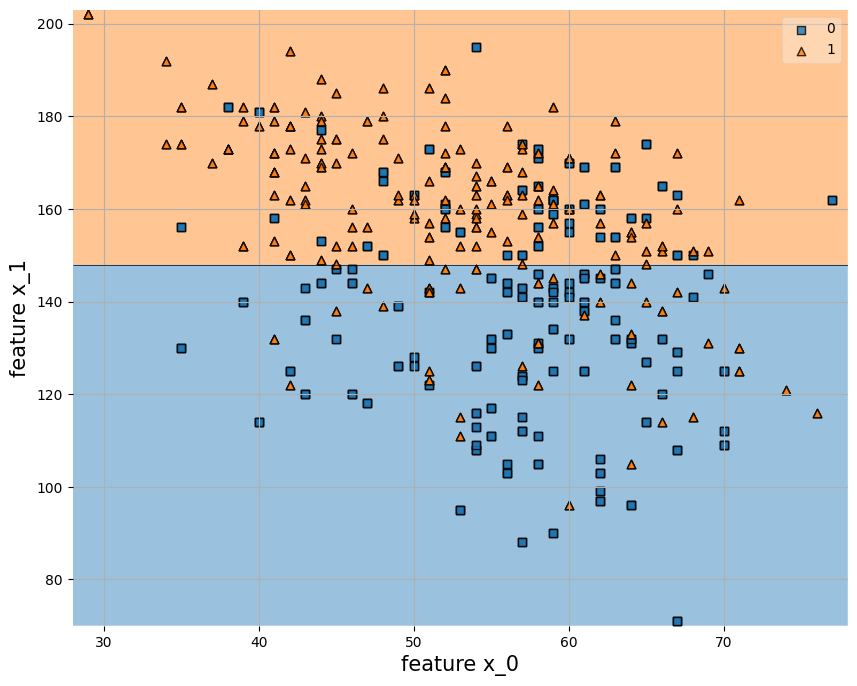

In [15]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

/Users/aigerimzhadikbay/inde577/Aigerim-CMOR-438-Spring-2025/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


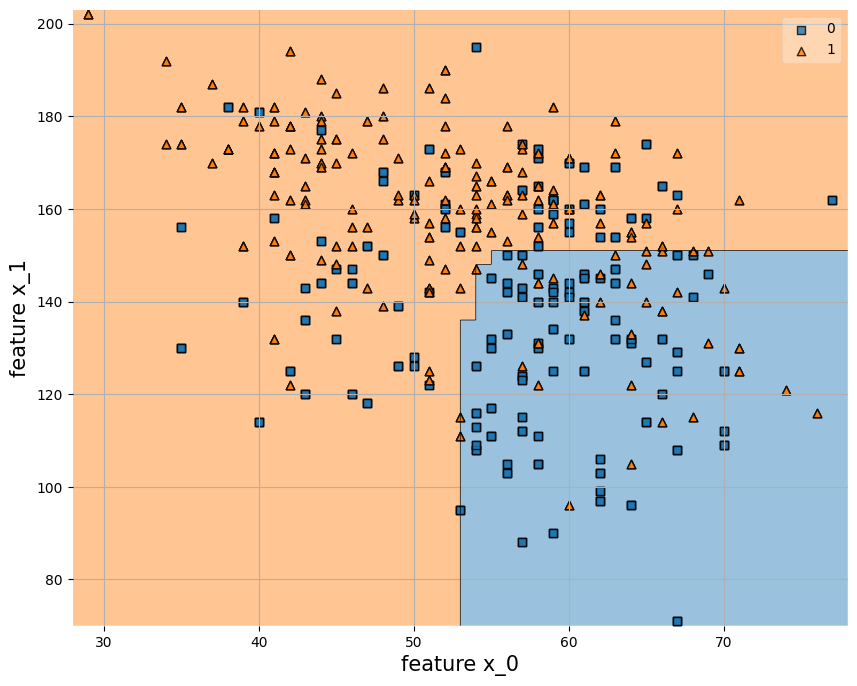

In [17]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Decision Tree has very jagged boundaries, while bagging has a straight line and Forest had also a simple but blocky boundary. 

Now, let's compare the performance of all of the models when considering more featuers in the dataset. 

In [18]:

X = df[["age", "thalach", "trestbps", "fbs"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)

forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       203
           1       0.70      0.77      0.74       207

    accuracy                           0.72       410
   macro avg       0.72      0.72      0.72       410
weighted avg       0.72      0.72      0.72       410
 



In [19]:

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       203
           1       0.93      0.98      0.95       207

    accuracy                           0.95       410
   macro avg       0.95      0.95      0.95       410
weighted avg       0.95      0.95      0.95       410
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       203
           1       0.69      0.73      0.71       207

    accuracy                           0.70       410
   macro avg       0.70      0.70      0.70       410
weighted avg       0.70      0.70      0.70       410
 



We can see that the accuracy of the Forest classification improved from .69 to .72
Tree classificaiton also saw improvemen from .9 to .95 while the Bagging saw a decrease from .71 to .70.

Looking at the classificaiton reports, adding features greatly benefited Decision Tree, which now had more flexibility to learn. Forest also improved, but only slightly, as depth was still low. Bagging performance declined slightly, possibly due to noise introduced by the new features when using shallow trees.

We can also take a look at Feature Importance to see the proportions for each used feature.

In [20]:
names = ["age", "thalach", "trestbps", "fbs"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

age 0.318
thalach 0.528
trestbps 0.154
fbs 0.0


---
---
# Boosting
**Boosting** is an ensemble method that trains predictors sequentially, each trying to correct the errors made by the previous predictor.


## AdaBoost
- An ensemble learning technique that combines several weak learners, typically shallow trees, into one strong classifier. It works by focusing on the samples that are hardest to classify and adjusting the model's attention at each step to reduce error.
I will apply AdaBoost to the heart disease dataset to model the relationship between features and diagnosis outcomes, and visualize its non-linear decision boundaries.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("Datasets/heart.csv")

# Select two features and the target
X = df[['thalach', 'oldpeak']].values
y = df['target'].values  # 0 = no disease, 1 = disease

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Create and train AdaBoost model
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    learning_rate=0.5,
    algorithm="SAMME"
)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)


/Users/aigerimzhadikbay/inde577/Aigerim-CMOR-438-Spring-2025/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Evaluate performance:

AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       202
           1       0.67      0.74      0.70       208

    accuracy                           0.69       410
   macro avg       0.69      0.68      0.68       410
weighted avg       0.69      0.69      0.68       410



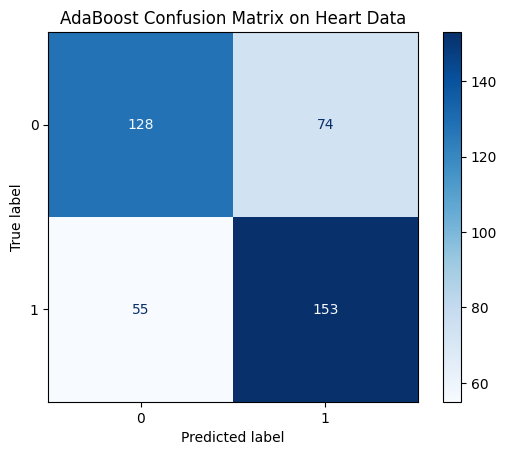

In [24]:
print("AdaBoost Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("AdaBoost Confusion Matrix on Heart Data")
plt.show()

Class 0 represents patients without heart disease and 1 represents those with heart disease.
- The model correctly identified 153 patients who have heart disease.
- It correctly classified 128 patients as not having heart disease.
- 74 patients were incorrectly classified as having heart disease when they did not.
- 55 with heart disease were misclassified as not having the disease.
Despite a great number of correct predictions, a notable number of false positives and false negatives exist, showing that theres potential room for improvement either via hyperparameter tuning or maybe a more complex ensemble model.

The performance is still promising and shows that boosting with decision stumps (shallow trees) is effective at capturing meaningful patterns in the data.


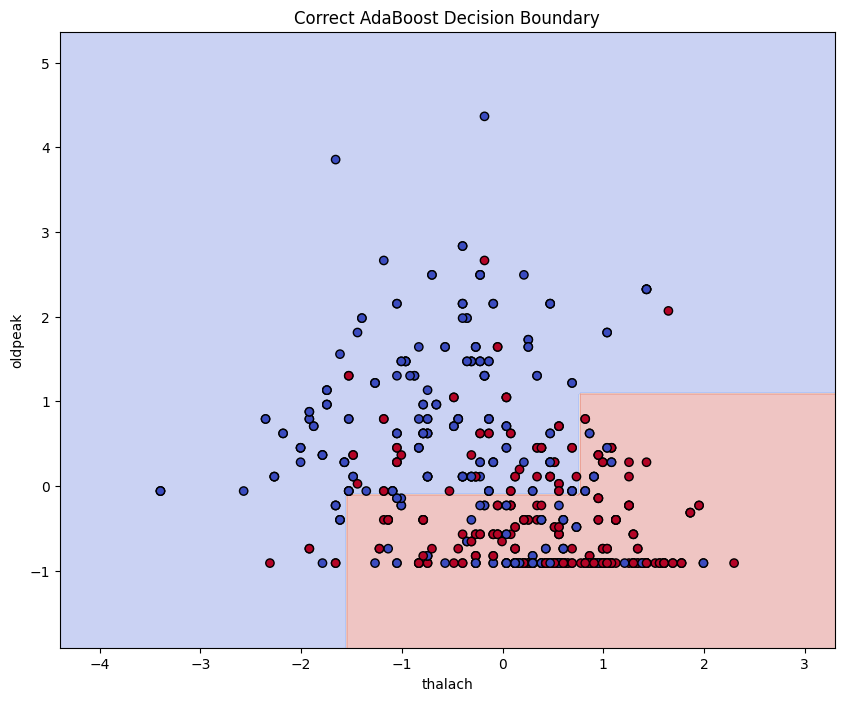

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the grid using AdaBoost
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.xlabel("thalach")
plt.ylabel("oldpeak")
plt.title("Correct AdaBoost Decision Boundary")
plt.show()


The blue region corresponds to AdaBoost classifying as 0 (no heart disease).
The red region is where AdaBoost predicts 1 (has heart disease).
The boundary between classes is jagged, which is expected because AdaBoost builds an ensemble of weak decision trees that iteratively adjust based on their previous errors. The overlap of some blue and red dots in opposing regions suggests the areas wehre the model makes mistakes or uncertain predictions.

Through this notebook, we explored Decision Trees, Bagging, Random Forests, and AdaBoost applied to the heart disease dataset. 

Visualizing the decision boundaries and confusion matrices provided further insights into how each model behaves in terms of classification regions.